In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls "/gdrive/My Drive/DiabeticRetinopathy_Detection"

DR_Train002.ipynb  imagedata_train_0_4000.npy  train002Labels.csv
DR_Train.ipynb	   imagedata_train_0_8394.npy


             0  1
0   19500_left  0
1  19500_right  0
2   19503_left  0
3  19503_right  0
4   19504_left  1
(8394,)
0
2019-02-22 18:09:46.947781
Train on 7554 samples, validate on 840 samples
Epoch 1/15
 - 15s - loss: 7.7800 - acc: 0.3779 - val_loss: 3.8135 - val_acc: 0.7571
Epoch 2/15
 - 15s - loss: 4.7421 - acc: 0.6291 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 3/15
 - 15s - loss: 4.3330 - acc: 0.6861 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 4/15
 - 15s - loss: 4.2542 - acc: 0.7035 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 5/15
 - 15s - loss: 4.2373 - acc: 0.7109 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 6/15
 - 15s - loss: 4.1876 - acc: 0.7133 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 7/15
 - 15s - loss: 4.2010 - acc: 0.7166 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 8/15
 - 15s - loss: 4.1846 - acc: 0.7199 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 9/15
 - 15s - loss: 4.1586 - acc: 0.7237 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 10/15
 - 15s - loss: 4.1531 - acc: 0.7256 - va

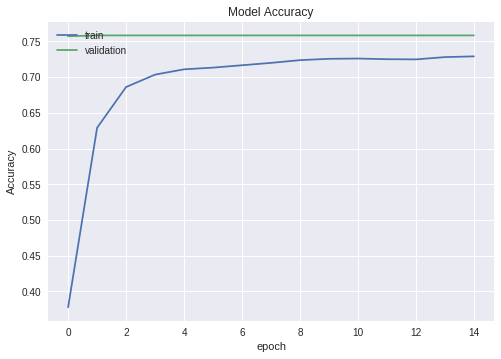

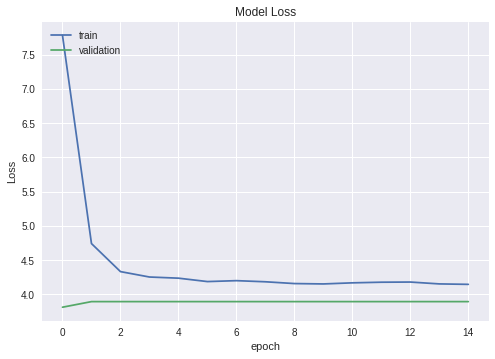

In [5]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/DiabeticRetinopathy_Detection/imagedata_train_0_8394.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/DiabeticRetinopathy_Detection/train002Labels.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#Adding classifier neural network (Dense + Softmax)
new_model = Sequential()
#add a fc1 layer with 128 output neurons and a dropout layer1
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#add a fc2 layer with 128 output neurons and a dropout layer2
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#adding a softmax layer with 5 classes
new_model.add(Dense(units = 5))
new_model.add(keras.layers.Activation('softmax'))
#configures the model for training
sgd = SGD(lr=0.000001, decay=1e-6, momentum=0.9,nesterov=True)
new_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'] )

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 15, verbose = 2, validation_split = 0.1)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/DiabeticRetinopathy_Detection/my_model_train002_0_8394_256.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [0]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/DiabeticRetinopathy_Detection/imagedata_train_0_8394.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/DiabeticRetinopathy_Detection/train002Labels.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#load partially trained model
new_model = load_model('/gdrive/My Drive/DiabeticRetinopathy_Detection/my_model_train002_0_8394_256.h5')

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 10, verbose = 2, validation_split = 0.1)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/DiabeticRetinopathy_Detection/my_model_train002_0_8394_256.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



             0  1
0   19500_left  0
1  19500_right  0
2   19503_left  0
3  19503_right  0
4   19504_left  1
(8394,)
0
2019-02-22 18:25:31.911592
Train on 7554 samples, validate on 840 samples
Epoch 1/5
 - 16s - loss: 4.1727 - acc: 0.7405 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 2/5
 - 15s - loss: 4.1693 - acc: 0.7413 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 3/5
 - 15s - loss: 4.1693 - acc: 0.7413 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 4/5
 - 15s - loss: 4.1693 - acc: 0.7413 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 5/5
 - 15s - loss: 4.1693 - acc: 0.7413 - val_loss: 3.8952 - val_acc: 0.7583
{'val_loss': [3.8952063878377277, 3.8952063878377277, 3.8952063878377277, 3.8952063878377277, 3.8952063878377277], 'val_acc': [0.7583333333333333, 0.7583333333333333, 0.7583333333333333, 0.7583333333333333, 0.7583333333333333], 'loss': [4.17268578353495, 4.169282315804399, 4.169282318834341, 4.169282303716192, 4.16928231782436], 'acc': [0.7405348159915277, 0.7413290971670639, 0.741329097167

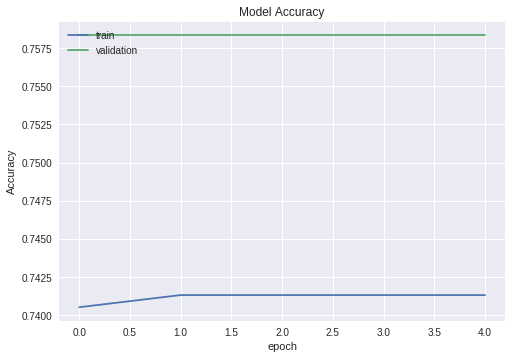

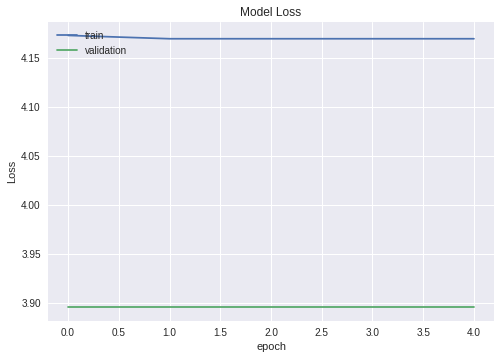

In [7]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/DiabeticRetinopathy_Detection/imagedata_train_0_8394.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/DiabeticRetinopathy_Detection/train002Labels.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#Adding classifier neural network (Dense + Softmax)
new_model = Sequential()
#add a fc1 layer with 128 output neurons and a dropout layer1
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#add a fc2 layer with 128 output neurons and a dropout layer2
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#adding a softmax layer with 5 classes
new_model.add(Dense(units = 5))
new_model.add(keras.layers.Activation('softmax'))
#configures the model for training
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9,nesterov=True)
new_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'] )

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 5, verbose = 2, validation_split = 0.1)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/DiabeticRetinopathy_Detection/my_model_train002_0_8394_256_01.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

